### Цель проекта

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Необходимо построить модель, которая предскажет температуру стали.

### Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.


### План работы

1. Цель - преобразование датасета таким образом, чтобы на каждую измеренную температуру(целевой признак) иметь признаки для фикcированного состояния - сколько добавили сыпучих материалов, сколько проволоки, сколько нагревали, какие мощности использовались на отдельных этапах каждой партии.
Для этого требуется дополнительно добавить таблицу с показаниями электродов, дополненную по каждой партии:
    - Суммарное время нагрева электродами, то есть сумму значений по всем промежуткам между запусками нагрева электродов.
    - Количество запусков нагрева электродами.
    - Среднее соотношение потребления активной и реактивной мощности.
    (По всем полученным столбцам вычислим : средние, минимальные и максимальные значения, медиану и величины 25%- и 75%-квартилей).

После последовательно обработать признаки и убрать лишние строки - где не будет возможности заполнить температурой.

2. разбиение на тренировочный, валидационный и тестовый датасеты
3. подбор модели для регрессии и оптимизация параметров. Возможно, возврат к предобработке данных.
4. оценка качества модели - подбор метрики, оценка на адекватность.

### Задача проекта

Задача проекта - определение финальной температуры для каждой партии. Промежуточные температуры нам определять не нужно.

# Отчет

После конкретизации поставленной на проекте задачи о том, что необходимо определить только финальную температуру для каждой партии, а промежуточные температуры нам определять не нужно, план был подкорректирован.

Новый план подготовки датасета для анализа уже состоял не в том, чтобы на каждую измеренную температуру(целевой признак) иметь признаки для фикcированного состояния, а в том, чтобы разрозненная информация о процессе плавления была сведена к одному датасету таким образом, чтобы на каждую финальную температуру(целевой признак) иметь признаки для каждой партии - сколько добавили сыпучих материалов, сколько проволоки, сколько нагревали, какие мощности использовались для каждой партии и др.

В ходе проделанной работы был сделан исследователький анализ данных в соответсвии со скорректинованным планом, в результате которого привели данные к нужному формату, от лишних избавились. Далее в соответствии с планом были сделаны все остальные пункты:
    - разбиение на тренировочный, валидационный и тестовый датасеты
    - подбор модели для регрессии и оптимизация параметров
    - оценка качества модели.

Основные трудности были на этапе подготовки единого датасета к анализу, т.к. данные были разрозненные по разным таблицам и в разной степени неполности. Чтобы того, чтобы решить вопросы были сделаны следующие шаги:
    - детальное изучение теоретической основы процесса, чтобы не сделать ошибку в логике
    - тщательный анализ данных в отдельных таблицах, отбраковка выбросов
    - получение новых признаком, которые помогут отпимизировать слияние датасетов.

В результате предобработки данных мы получили таблицу, где из исходных признаков для каждой партии остались только столбец 'Газ 1', а остальные признаки были вновь созданными:

    - Суммарное время нагрева электродами партии        
    - Количество запусков нагрева электродами партии 
    - Суммарная активная мощность цикла 
    - Суммарная реактивная мощность цикла
    - Суммарные сыпучии партии
    - Суммарные проволочные партии 
    - Температура начальная
    - Температура финальная (целевой признак). 

В целом в решении задачи можно выделить следующие ключевые шаги:
    - изучение самого процесса производства
    - убедиться, что задача верно понята
    - анализ исходных данных с визуализацией
    - получение новых признаков и подготовка таблиц к слиянию
    - разбиение датасета на тренировочный, валидационный и тестовый
    - обучение разных моделей с настройкой гиперпараметров
    - оценка результата.
    
Для тестирования были выбраны четыре варианта:
    1. LinearRegression
    2. DecisionTreeRegressor c подбором параметров
    3. RandomForestRegresso с подбором параметров
    4. LinearRegression с оценокой кросс-валидацией
    5. CatBoostRegressor
    6. CatBoostRegressor с оценокой кросс-валидацией.

В данной работе для оценки финальной температуры процесса была выбрана модель CatBoostRegressor с оценкой кросс-валидацией.

В этом случае наилучший показатель MAE - 6.24 (при цели получить результат 8.7), что означает отклонение в определении финальной температуры в пределах 6.24.

Код работы приведен ниже.

# 1. Загрузка и подготовка данных

Импортируем нужные библиотеки.

In [93]:
import pandas as pd

In [94]:
import numpy as np

In [95]:
import matplotlib.pyplot as plt

In [96]:
from datetime import timedelta, datetime

In [97]:
from sklearn.metrics import mean_absolute_error

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
from sklearn.model_selection import cross_val_score

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
from sklearn.tree import DecisionTreeRegressor

In [103]:
import lightgbm as lgb

In [104]:
from lightgbm import LGBMRegressor

In [105]:
from catboost import CatBoostRegressor

In [106]:
from sklearn.preprocessing import StandardScaler

Загружаем таблицы с данными.

In [107]:
#данные об электродах
data_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')

In [108]:
#данные о подаче сыпучих материалов (объём)
data_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')

In [109]:
#данные о подаче сыпучих материалов (время)
data_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')

In [110]:
#данные о продувке сплава газом
data_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')

In [111]:
#результаты измерения температуры
data_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')

In [112]:
#данные о проволочных материалах (объём)
data_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')

In [113]:
#данные о проволочных материалах (время)
data_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')

Знакомимся с данными: смотрим пропуски, корректность типов, дубликаты.

Работаем с выбросами на данных, т.к. у нас задача регрессии, чувствительная к выбросам.

Далее преобразуем таблицу в такой вид, чтобы каждой партии соответствовала одна запись с соответствующими параметрами, чтобы потом по партиям свести все параметры вместе.

Т.к. тайминг нам не нужен, промежуточные показатели мы либо преобразовываем, либо опускаем.

In [114]:
#посчитаем количество партий, которые упомянуты в каждой таблице - для информации
keys = []
for data in [data_arc, data_bulk, data_wire, data_gas, data_temp]:
    key = len(data['key'].value_counts())
    keys.append(key)
print(pd.DataFrame({'таблица': ['data_arc', 'data_bulk', 'data_wire', 'data_gas', 'data_temp'], 'количество партий': keys}))    

     таблица  количество партий
0   data_arc               3214
1  data_bulk               3129
2  data_wire               3081
3   data_gas               3239
4  data_temp               3216


# Данные об электродах

In [115]:
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
key                     14876 non-null int64
Начало нагрева дугой    14876 non-null object
Конец нагрева дугой     14876 non-null object
Активная мощность       14876 non-null float64
Реактивная мощность     14876 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [116]:
data_arc.head(40)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.438063,0.283043
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,1.296415,0.892914
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.490377,0.305281
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.827743,0.516874
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.062053,0.671494


Пропусков нет, требуется только заменить в столбцах с началом и концом нагрева тип данных на дату.

In [117]:
data_arc['Начало нагрева дугой'] = pd.to_datetime(data_arc['Начало нагрева дугой'], format='%Y-%m-%d %H:%M:%S')
data_arc['Конец нагрева дугой'] = pd.to_datetime(data_arc['Конец нагрева дугой'], format='%Y-%m-%d %H:%M:%S')

In [118]:
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
key                     14876 non-null int64
Начало нагрева дугой    14876 non-null datetime64[ns]
Конец нагрева дугой     14876 non-null datetime64[ns]
Активная мощность       14876 non-null float64
Реактивная мощность     14876 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


In [119]:
data_arc.describe()

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.670441,0.452592
std,934.571502,0.408159,5.878702
min,1.000000,0.030002,-715.504924
25%,806.000000,0.395297,0.290991
50%,1617.000000,0.555517,0.415962
75%,2429.000000,0.857034,0.637371
max,3241.000000,3.731596,2.676388


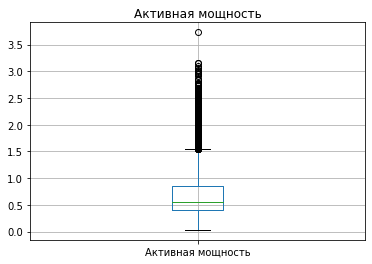

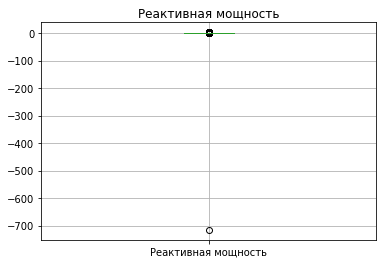

In [120]:
for column in data_arc[[ 'Активная мощность', 'Реактивная мощность']]: 
    data_arc.boxplot(column)
    plt.title(column)
    plt.show()

Видим явный выброс, избавляемся от него.

In [121]:
data_arc = data_arc[data_arc['Реактивная мощность'] > -600]

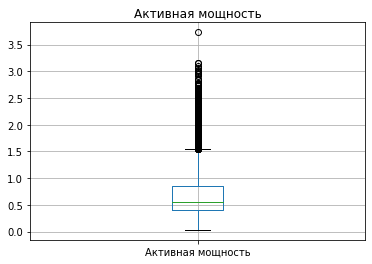

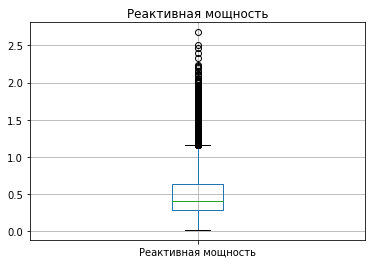

In [122]:
for column in data_arc[[ 'Активная мощность', 'Реактивная мощность']]: 
    data_arc.boxplot(column)
    plt.title(column)
    plt.show()

In [123]:
data_arc.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


Для каждой партии найдем новые признаки:

- Суммарное время нагрева электродами, то есть сумму значений по всем промежуткам между запусками нагрева электродов
- Количество запусков нагрева электродами
- Сумму значений произведения потребления активной мощности на продолжительность нагрева каждого цикла
- Сумму значений произведения потребления реактивной мощности на продолжительность нагрева каждого цикла

In [124]:
data_arc['Продолжительность цикла'] = (data_arc['Конец нагрева дугой'] - data_arc['Начало нагрева дугой']).dt.total_seconds()

In [125]:
data_arc['Суммарное время нагрева электродами партии'] = data_arc.groupby('key')['Активная мощность'].transform('sum')

In [126]:
data_arc['Количество запусков нагрева электродами партии'] = data_arc.groupby('key')['Продолжительность цикла'].transform('count')

In [127]:
data_arc['Активная мощность цикла'] = data_arc['Активная мощность'] * data_arc['Продолжительность цикла']
data_arc['Реактивная мощность цикла'] = data_arc['Реактивная мощность'] * data_arc['Продолжительность цикла']

In [128]:
data_arc['Суммарная активная мощность цикла'] = data_arc.groupby('key')['Активная мощность цикла'].transform('sum')
data_arc['Суммарная реактивная мощность цикла'] = data_arc.groupby('key')['Реактивная мощность цикла'].transform('sum')

In [129]:
#data_arc.head()

Удаляем лишние столбцы и строки.

In [130]:
data_arc = data_arc.drop(columns=['Продолжительность цикла', 'Начало нагрева дугой', 'Конец нагрева дугой', 'Активная мощность', 'Реактивная мощность', 'Активная мощность цикла', 'Реактивная мощность цикла'], axis=1)
data_arc = data_arc.drop_duplicates().reset_index(drop=True)

In [131]:
data_arc.head()

,key,Суммарное время нагрева электродами партии,Количество запусков нагрева электродами партии,Суммарная активная мощность цикла,Суммарная реактивная мощность цикла
0,1,4.878147,5,1207.804249,787.907510
1,2,3.052598,4,733.816470,487.590677
2,3,2.525882,5,443.583327,280.936835
3,4,3.209250,4,670.663327,429.935932
4,5,3.347173,4,997.496095,664.940090


# Данные о подаче сыпучих материалов (объём)

In [132]:
data_bulk.head(40)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
5,6,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,201.0,154.0
6,7,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,152.0,154.0
7,8,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.0,NaN,252.0,153.0
8,9,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,NaN,99.0,203.0
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,102.0,204.0


In [133]:
data_bulk.info()
print('\n', 'Количество дубликатов:', data_bulk.duplicated().sum())
data_bulk.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
key        3129 non-null int64
Bulk 1     252 non-null float64
Bulk 2     22 non-null float64
Bulk 3     1298 non-null float64
Bulk 4     1014 non-null float64
Bulk 5     77 non-null float64
Bulk 6     576 non-null float64
Bulk 7     25 non-null float64
Bulk 8     1 non-null float64
Bulk 9     19 non-null float64
Bulk 10    176 non-null float64
Bulk 11    177 non-null float64
Bulk 12    2450 non-null float64
Bulk 13    18 non-null float64
Bulk 14    2806 non-null float64
Bulk 15    2248 non-null float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB

 Количество дубликатов: 0


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


В данной таблице, содержащей информацию об объеме подачи сыпучих материалов, тип данных корректный, но очень много пропусков. Можно предположить, что в места пропуска зафиксированы этапы, когда не подавались сыпучие материалы. Заменим пропуски нолями.

In [134]:
data_bulk = data_bulk.fillna(0)

In [135]:
# трансформируем таблицу по загрузке сыпучих веществ так, чтобы получился общий список загрузок с указанием партии и цикла.
data_bulk_all = pd.melt(data_bulk, id_vars=['key'], var_name='bulk', value_name='bulk_amount')
data_bulk_all.info()
data_bulk_all.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46935 entries, 0 to 46934
Data columns (total 3 columns):
key            46935 non-null int64
bulk           46935 non-null object
bulk_amount    46935 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


,key,bulk,bulk_amount
0,1,Bulk 1,0.0
1,2,Bulk 1,0.0
2,3,Bulk 1,0.0
3,4,Bulk 1,0.0
4,5,Bulk 1,0.0


In [136]:
#добавляем колонку с суммарной загрузкой
data_bulk_all['Суммарные сыпучии партии'] = data_bulk_all.groupby('key')['bulk_amount'].transform('sum')

In [137]:
#удаляем ненужные столбцы
data_bulk_all = data_bulk_all.drop(columns=['bulk_amount', 'bulk'], axis=1)
data_bulk_all = data_bulk_all.drop_duplicates().reset_index(drop=True)

In [138]:
data_bulk_all.head()

,key,Суммарные сыпучии партии
0,1,553.0
1,2,582.0
2,3,544.0
3,4,595.0
4,5,584.0


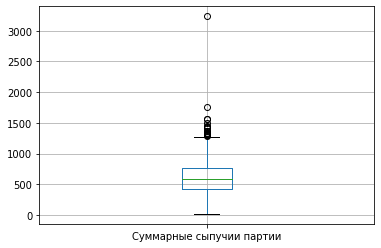

In [139]:
data_bulk_all.boxplot('Суммарные сыпучии партии')
plt.show()

In [140]:
#удалим выбросы
data_bulk_all = data_bulk_all[data_bulk_all['Суммарные сыпучии партии'] < 1500]

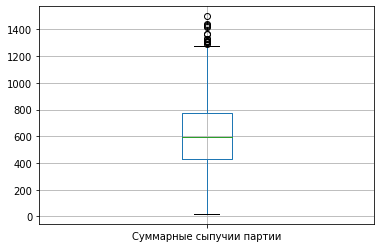

In [141]:
data_bulk_all.boxplot('Суммарные сыпучии партии')
plt.show()

# Данные о подаче сыпучих материалов (время)

In [142]:
data_bulk_time.head(40)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56
5,6,NaN,NaN,NaN,2019-05-03 13:59:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:53:27,NaN,2019-05-03 13:53:27,2019-05-03 13:53:27
6,7,NaN,NaN,NaN,2019-05-03 14:29:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 14:22:19,NaN,2019-05-03 14:22:19,2019-05-03 14:22:19
7,8,NaN,NaN,NaN,2019-05-03 15:04:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 14:55:46,NaN,2019-05-03 14:55:46,2019-05-03 14:55:46
8,9,NaN,NaN,NaN,2019-05-03 15:47:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 15:41:00,NaN,2019-05-03 15:41:00,2019-05-03 15:41:00
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 16:18:52,NaN,2019-05-03 16:18:52,2019-05-03 16:18:52


In [143]:
data_bulk_time.info()
print('\n', 'Количество дубликатов:', data_bulk_time.duplicated().sum())
data_bulk_time.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
key        3129 non-null int64
Bulk 1     252 non-null object
Bulk 2     22 non-null object
Bulk 3     1298 non-null object
Bulk 4     1014 non-null object
Bulk 5     77 non-null object
Bulk 6     576 non-null object
Bulk 7     25 non-null object
Bulk 8     1 non-null object
Bulk 9     19 non-null object
Bulk 10    176 non-null object
Bulk 11    177 non-null object
Bulk 12    2450 non-null object
Bulk 13    18 non-null object
Bulk 14    2806 non-null object
Bulk 15    2248 non-null object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB

 Количество дубликатов: 0


,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


В данной таблице, содержащей информацию о времени подачи сыпучих материалов, для нас нет интересующих параметров, т.к. задачи тайминга нет. Использовать ее не будем.

# Данные о проволочных материалах (объём)

In [144]:
data_wire.head(40)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,99.109917,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,98.061600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,155.282394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,113.393279,9.143681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,81.244796,12.376000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
data_wire.info()
print('\n', 'Количество дубликатов:', data_wire.duplicated().sum())
data_wire.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
key       3081 non-null int64
Wire 1    3055 non-null float64
Wire 2    1079 non-null float64
Wire 3    63 non-null float64
Wire 4    14 non-null float64
Wire 5    1 non-null float64
Wire 6    73 non-null float64
Wire 7    11 non-null float64
Wire 8    19 non-null float64
Wire 9    29 non-null float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB

 Количество дубликатов: 0


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060484,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


In [146]:
data_wire = data_wire.fillna(0)

In [147]:
# трансформируем таблицу по загрузке проволочных так, чтобы получился общий список загрузок с указанием партии и цикла.
data_wire_all = pd.melt(data_wire, id_vars=['key'], var_name='wire', value_name='wire_amount')
data_wire_all.info()
data_wire_all.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27729 entries, 0 to 27728
Data columns (total 3 columns):
key            27729 non-null int64
wire           27729 non-null object
wire_amount    27729 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 650.0+ KB


,key,wire,wire_amount
0,1,Wire 1,60.059998
1,2,Wire 1,96.052315
2,3,Wire 1,91.160157
3,4,Wire 1,89.063515
4,5,Wire 1,89.238236


In [148]:
data_wire_all['Суммарные проволочные партии'] = data_wire_all.groupby('key')['wire_amount'].transform('sum')

In [149]:
#удаляем ненужные столбцы
data_wire_all = data_wire_all.drop(columns=['wire_amount', 'wire'], axis=1)
data_wire_all = data_wire_all.drop_duplicates().reset_index(drop=True)
data_wire_all.head()

,key,Суммарные проволочные партии
0,1,60.059998
1,2,96.052315
2,3,91.160157
3,4,89.063515
4,5,98.352796


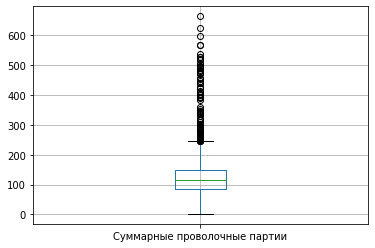

In [150]:
data_wire_all.boxplot('Суммарные проволочные партии')
plt.show()

In [151]:
#удалим значения более 550
data_wire_all = data_wire_all[data_wire_all['Суммарные проволочные партии'] < 550]

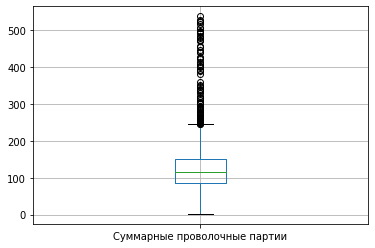

In [152]:
data_wire_all.boxplot('Суммарные проволочные партии')
plt.show()

# Данные о проволочных материалах (время)

In [153]:
data_wire_time.head(40)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2019-05-03 13:59:02,2019-05-03 13:59:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2019-05-03 14:28:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2019-05-03 15:03:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2019-05-03 15:42:43,2019-05-03 15:58:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,2019-05-03 16:20:25,2019-05-03 16:21:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
data_wire_time.info()
print('\n', 'Количество дубликатов:', data_wire_time.duplicated().sum())
data_wire_time.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
key       3081 non-null int64
Wire 1    3055 non-null object
Wire 2    1079 non-null object
Wire 3    63 non-null object
Wire 4    14 non-null object
Wire 5    1 non-null object
Wire 6    73 non-null object
Wire 7    11 non-null object
Wire 8    19 non-null object
Wire 9    29 non-null object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB

 Количество дубликатов: 0


,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


Аналогично таблице со временем подачи данные по таймингу нам не нужны.

# Данные о продувке сплава газом

In [155]:
data_gas.head(40)

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
5,6,11.273392
6,7,9.836267
7,8,15.171553
8,9,8.216623
9,10,6.529891


In [156]:
data_gas.info()
print('\n', 'Количество дубликатов:', data_gas.duplicated().sum())
data_gas.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
key      3239 non-null int64
Газ 1    3239 non-null float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB

 Количество дубликатов: 0


,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


В таблице о продувке сплава газом данные корректные.

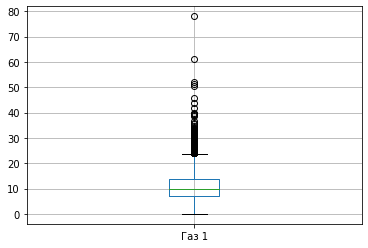

In [157]:
#смотрим распределение, чтобы избавиться от хвостов
data_gas.boxplot('Газ 1')
plt.show()

In [158]:
# Удаляем выбросы более 40
data_gas =  data_gas[data_gas['Газ 1'] < 40]

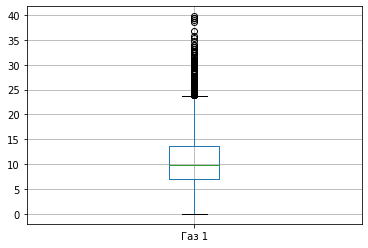

In [159]:
data_gas.boxplot('Газ 1')
plt.show()

# Данные о температурах

In [160]:
data_temp.head(40)

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
5,2,2019-05-03 11:37:27,1581.0
6,2,2019-05-03 11:38:00,1577.0
7,2,2019-05-03 11:49:38,1589.0
8,2,2019-05-03 11:55:50,1604.0
9,2,2019-05-03 11:58:24,1608.0


In [161]:
data_temp.info()
print('\n', 'Количество дубликатов:', data_temp.duplicated().sum())
data_temp.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
key             15907 non-null int64
Время замера    15907 non-null object
Температура     13006 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB

 Количество дубликатов: 0


,key,Температура
count,15907.000000,13006.000000
mean,1607.880870,1591.840920
std,942.212073,21.375851
min,1.000000,1191.000000
25%,790.000000,1581.000000
50%,1618.000000,1591.000000
75%,2427.000000,1601.000000
max,3241.000000,1705.000000


Меняем тип данных для времени замера на дату.

In [162]:
data_temp['Время замера'] = pd.to_datetime(data_temp['Время замера'], format='%Y-%m-%d %H:%M:%S')

In [163]:
#добавляем колонки с начальной и далее финальной температурой
data_temp['Температура начальная'] = data_temp.groupby('key')['Температура'].transform('first')

In [164]:
data_temp['Температура финальная'] = data_temp.groupby('key')['Температура'].transform('last')

In [165]:
data_temp.head()

,key,Время замера,Температура,Температура начальная,Температура финальная
0,1,2019-05-03 11:16:18,1571.0,1571.0,1613.0
1,1,2019-05-03 11:25:53,1604.0,1571.0,1613.0
2,1,2019-05-03 11:29:11,1618.0,1571.0,1613.0
3,1,2019-05-03 11:30:01,1601.0,1571.0,1613.0
4,1,2019-05-03 11:30:39,1613.0,1571.0,1613.0


Преобразуем таблицу в такой вид, чтобы каждой партии соответствовала начальная и конечная температура (можно температуру нагрева не вычислять, т.к. зависимость с начальной температурой все равно прямая).
Все лишние данные и строки, где начальная и финальная совпадают, уберем.

In [166]:
data_temp = data_temp.drop(columns=['Время замера','Температура'], axis=1)
data_temp = data_temp[data_temp['Температура финальная']!=data_temp['Температура начальная']]
data_temp = data_temp.drop_duplicates().reset_index(drop=True)

In [167]:
data_temp.describe()

,key,Температура начальная,Температура финальная
count,2433.000000,2433.000000,2433.000000
mean,1249.351418,1588.297164,1595.351007
std,720.624129,29.405333,16.017495
min,1.000000,1191.000000,1541.000000
25%,626.000000,1571.000000,1587.000000
50%,1250.000000,1587.000000,1593.000000
75%,1871.000000,1605.000000,1599.000000
max,2499.000000,1679.000000,1700.000000


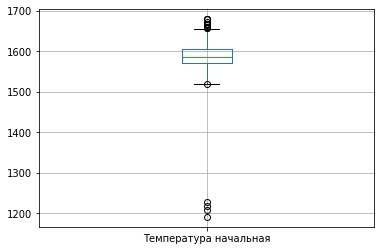

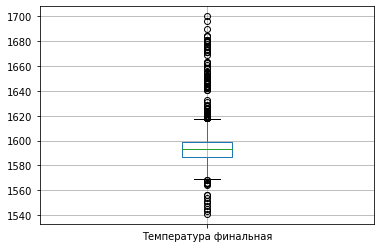

In [168]:
data_temp.boxplot('Температура начальная')
plt.show()
data_temp.boxplot('Температура финальная')
plt.show()

In [169]:
# Температура для нас очень важный параметр, поэтому удаляем хвосты с IQR  3, чтобы не потерять лишнее
data_temp =  data_temp.loc[(data_temp['Температура начальная'] < 1707) & (data_temp['Температура начальная'] > 1469)]
data_temp =  data_temp.loc[(data_temp['Температура финальная'] < 1635) & (data_temp['Температура финальная'] > 1551)]

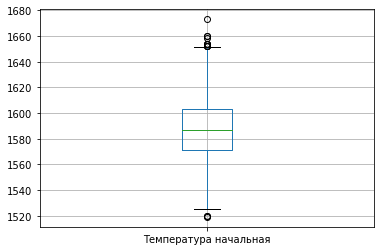

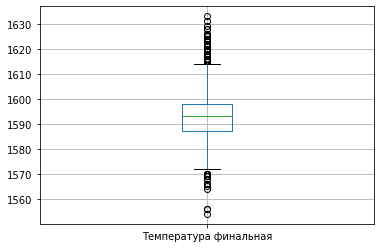

In [170]:
data_temp.boxplot('Температура начальная')
plt.show()
data_temp.boxplot('Температура финальная')
plt.show()

# Получаем единую таблицу

In [171]:
#последовательно объединяем таблицы по партиям
data_total1 = pd.merge(data_arc, data_bulk_all, on='key', how='inner')
data_total2 = pd.merge(data_total1, data_wire_all, on='key', how='inner')
data_total3 = pd.merge(data_total2, data_gas, on='key', how='inner')
data_total = pd.merge(data_total3, data_temp, on='key', how='inner')

In [172]:
data_total.info()
data_total.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2270 entries, 0 to 2269
Data columns (total 10 columns):
key                                               2270 non-null int64
Суммарное время нагрева электродами партии        2270 non-null float64
Количество запусков нагрева электродами партии    2270 non-null int64
Суммарная активная мощность цикла                 2270 non-null float64
Суммарная реактивная мощность цикла               2270 non-null float64
Суммарные сыпучии партии                          2270 non-null float64
Суммарные проволочные партии                      2270 non-null float64
Газ 1                                             2270 non-null float64
Температура начальная                             2270 non-null float64
Температура финальная                             2270 non-null float64
dtypes: float64(8), int64(2)
memory usage: 195.1 KB


,key,Суммарное время нагрева электродами партии,Количество запусков нагрева электродами партии,Суммарная активная мощность цикла,Суммарная реактивная мощность цикла,Суммарные сыпучии партии,Суммарные проволочные партии,Газ 1,Температура начальная,Температура финальная
0,1,4.878147,5,1207.804249,787.907510,553.0,60.059998,29.749986,1571.0,1613.0
1,2,3.052598,4,733.816470,487.590677,582.0,96.052315,12.555561,1581.0,1602.0
2,3,2.525882,5,443.583327,280.936835,544.0,91.160157,28.554793,1596.0,1599.0
3,4,3.209250,4,670.663327,429.935932,595.0,89.063515,18.841219,1601.0,1625.0
4,5,3.347173,4,997.496095,664.940090,584.0,98.352796,5.413692,1576.0,1602.0
5,6,3.955108,4,1157.263817,804.657489,676.0,108.224477,11.273392,1543.0,1596.0
6,7,2.547375,4,622.474471,380.925081,627.0,98.061600,9.836267,1586.0,1599.0
7,8,3.762755,4,1246.965366,917.490256,914.0,155.282394,15.171553,1577.0,1598.0
8,9,2.081951,5,331.455184,234.774681,526.0,122.536960,8.216623,1587.0,1592.0
9,10,2.923622,6,458.134349,412.035721,509.0,93.620796,6.529891,1574.0,1593.0


# Разбиение на тренировочный, валидационный и тестовый датасеты

In [173]:
target = data_total['Температура финальная']
features = data_total.drop(columns='Температура финальная', axis=1)

In [174]:
# делим выборку на обучающую, валидационную и тестовую в соотношении 3:1:1.
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)

# Подбор модели для регрессии и оптимизация параметров

Модель линейной регресии - самый простой вариант. Практически невозможно переобучить.

In [175]:
model = LinearRegression()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
predicted_test = model.predict(features_test)
print(' МАЕ валидационной выборки: ', mean_absolute_error(target_valid, predicted_valid), '\n', 'МАЕ тестовой выборки: ', mean_absolute_error(target_test, predicted_test))

 МАЕ валидационной выборки:  6.190464879930925 
 МАЕ тестовой выборки:  6.925082067867008


Т.к. признаки имеют разный масштаб проведем стандартизацию данных.

In [176]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train_scaled = scaler.transform(features_train)
features_valid_scaled = scaler.transform(features_valid)
features_test_scaled = scaler.transform(features_test)
model = LinearRegression()
model.fit(features_train_scaled, target_train)
predicted_valid = model.predict(features_valid_scaled)
predicted_test = model.predict(features_test_scaled)
print(' МАЕ валидационной выборки: ', mean_absolute_error(target_valid, predicted_valid), '\n', 'МАЕ тестовой выборки: ', mean_absolute_error(target_test, predicted_test))

 МАЕ валидационной выборки:  6.190464879930928 
 МАЕ тестовой выборки:  6.9250820678670575


Видим, что стандартизация эффекта не дала, поэтому можно ее не использовать далее.

Обучаем разные модели и оцениваем их качество уже кросс-валидацией.

In [177]:
model = LinearRegression()
scores = -cross_val_score(model, features, target, cv=10, scoring='neg_mean_absolute_error')
print('МАЕ:', scores.mean())

МАЕ: 6.347947234022019


In [178]:
for depth in range(1, 10):
    model = DecisionTreeRegressor (random_state=12345, max_depth=depth)
    scores = -cross_val_score(model, features, target, cv=3, scoring='neg_mean_absolute_error')
    print('MАЕ для:', depth, scores.mean())

MАЕ для: 1 7.922870232923422
MАЕ для: 2 7.423805349916922
MАЕ для: 3 7.369061238337957
MАЕ для: 4 7.086144167244085
MАЕ для: 5 7.136714373323116
MАЕ для: 6 7.150289863462729
MАЕ для: 7 7.336774679855544
MАЕ для: 8 7.5128633785132815
MАЕ для: 9 7.675094332042616


In [179]:
for estim in range(1, 101, 10):
    model = RandomForestRegressor(n_estimators=estim, random_state=12345)
    scores = -cross_val_score(model, features, target, cv=3, scoring='neg_mean_absolute_error')
    print('MАЕ для:', estim, scores.mean())

MАЕ для: 1 9.668887560895486
MАЕ для: 11 6.91639164283374
MАЕ для: 21 6.686243724620986
MАЕ для: 31 6.652732900694578
MАЕ для: 41 6.635423263659991
MАЕ для: 51 6.63003859175322
MАЕ для: 61 6.631873736052583
MАЕ для: 71 6.622743506392827
MАЕ для: 81 6.629486504328173
MАЕ для: 91 6.636188514027098


Обучаем модели CatBoostRegressor с разбиением на выборки и с кросс-валидацией.

In [180]:
model = CatBoostRegressor()
model.fit(features_train, target_train, verbose=10)
pred_valid = model.predict(features_valid)
pred_test = model.predict(features_test)
print('\n', 'МАЕ валидационной выборки: ', mean_absolute_error(target_valid, pred_valid), '\n', 'МАЕ тестовой выборки: ', mean_absolute_error(target_test, pred_test))

0:	learn: 10.5703010	total: 2.05ms	remaining: 2.05s
10:	learn: 9.8301837	total: 113ms	remaining: 10.1s
20:	learn: 9.2938138	total: 227ms	remaining: 10.6s
30:	learn: 8.9180955	total: 414ms	remaining: 13s
40:	learn: 8.6134788	total: 606ms	remaining: 14.2s
50:	learn: 8.3816063	total: 799ms	remaining: 14.9s
60:	learn: 8.1901500	total: 991ms	remaining: 15.3s
70:	learn: 8.0258693	total: 1.19s	remaining: 15.5s
80:	learn: 7.8873502	total: 1.38s	remaining: 15.7s
90:	learn: 7.7744314	total: 1.49s	remaining: 14.9s
100:	learn: 7.6662541	total: 1.68s	remaining: 15s
110:	learn: 7.5704061	total: 1.88s	remaining: 15.1s
120:	learn: 7.4782946	total: 2.16s	remaining: 15.7s
130:	learn: 7.3912055	total: 2.27s	remaining: 15.1s
140:	learn: 7.3178776	total: 2.48s	remaining: 15.1s
150:	learn: 7.2446624	total: 2.66s	remaining: 15s
160:	learn: 7.1824422	total: 2.86s	remaining: 14.9s
170:	learn: 7.1182043	total: 3.05s	remaining: 14.8s
180:	learn: 7.0487890	total: 3.25s	remaining: 14.7s
190:	learn: 6.9834176	total

0:	learn: 10.6301101	total: 1.17ms	remaining: 1.16s
1:	learn: 10.6034338	total: 2.48ms	remaining: 1.24s
2:	learn: 10.5827951	total: 3.49ms	remaining: 1.16s
3:	learn: 10.5578565	total: 4.61ms	remaining: 1.15s
4:	learn: 10.5401320	total: 5.38ms	remaining: 1.07s
5:	learn: 10.5176429	total: 6.67ms	remaining: 1.1s
6:	learn: 10.4959724	total: 7.48ms	remaining: 1.06s
7:	learn: 10.4779459	total: 8.32ms	remaining: 1.03s
8:	learn: 10.4586763	total: 9.03ms	remaining: 994ms
9:	learn: 10.4395363	total: 10.3ms	remaining: 1.02s
10:	learn: 10.4190518	total: 11ms	remaining: 991ms
11:	learn: 10.3994100	total: 11.7ms	remaining: 960ms
12:	learn: 10.3809910	total: 13ms	remaining: 988ms
13:	learn: 10.3622887	total: 14ms	remaining: 988ms
14:	learn: 10.3412446	total: 24.8ms	remaining: 1.63s
15:	learn: 10.3227139	total: 25.8ms	remaining: 1.59s
16:	learn: 10.3063550	total: 27ms	remaining: 1.56s
17:	learn: 10.2875225	total: 28.2ms	remaining: 1.54s
18:	learn: 10.2701184	total: 29.4ms	remaining: 1.52s
19:	learn: 1

Text(0.5, 0, 'depth')

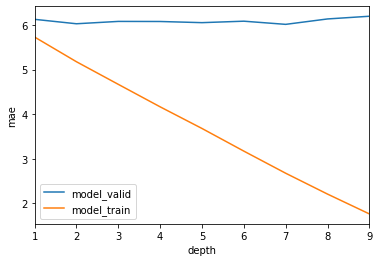

In [181]:
model_train = {}
model_valid = {}
for depth in range(1, 10, 1):
    model = CatBoostRegressor(depth=depth)
    model.fit(features_train, target_train)
    predicted_train = model.predict(features_train)
    predicted_valid = model.predict(features_valid)
    predicted_test = model.predict(features_test)
    
    model_train[depth] = mean_absolute_error(target_train, predicted_train)
    model_valid[depth] = mean_absolute_error(target_valid, predicted_valid)
    print('depth =', depth, ':', end='')
    print( mean_absolute_error(target_valid, predicted_valid), mean_absolute_error(target_test, predicted_test))

model_valid = pd.Series(model_valid)
model_train = pd.Series(model_train)
model_mae = pd.DataFrame({'model_valid': model_valid, 'model_train': model_train})
model_mae.plot()
plt.ylabel('mae')
plt.xlabel('depth')

Подбор depth (как и других гиперпараметров) в нашей ситуации улучшения не дал.

In [182]:
model = CatBoostRegressor()
scores = -cross_val_score(model, features, target, cv=10, scoring='neg_mean_absolute_error')
print('\n', 'МАЕ:', scores.mean())

0:	learn: 10.5617449	total: 4.14ms	remaining: 4.13s
1:	learn: 10.4741704	total: 6.78ms	remaining: 3.38s
2:	learn: 10.3915340	total: 10.8ms	remaining: 3.57s
3:	learn: 10.3049869	total: 87.9ms	remaining: 21.9s
4:	learn: 10.2191301	total: 91ms	remaining: 18.1s
5:	learn: 10.1524458	total: 95.5ms	remaining: 15.8s
6:	learn: 10.0805149	total: 99.7ms	remaining: 14.1s
7:	learn: 10.0089612	total: 188ms	remaining: 23.3s
8:	learn: 9.9369474	total: 192ms	remaining: 21.1s
9:	learn: 9.8731237	total: 195ms	remaining: 19.3s
10:	learn: 9.8079526	total: 284ms	remaining: 25.6s
11:	learn: 9.7474761	total: 289ms	remaining: 23.8s
12:	learn: 9.6907179	total: 292ms	remaining: 22.2s
13:	learn: 9.6301342	total: 296ms	remaining: 20.8s
14:	learn: 9.5751573	total: 383ms	remaining: 25.2s
15:	learn: 9.5233535	total: 388ms	remaining: 23.9s
16:	learn: 9.4680481	total: 394ms	remaining: 22.8s
17:	learn: 9.4114634	total: 479ms	remaining: 26.1s
18:	learn: 9.3674519	total: 485ms	remaining: 25s
19:	learn: 9.3221237	total: 49

## Выводы

В ходе проделанной работы был сделан исследователький анализ данных, в результате которого привели данные к нужному формату,  от лишних избавились.

Разрозненная информация о процессе плавления стали была сведена к одному датасету таким образом, чтобы на каждую измеренную температуру(целевой признак) иметь признаки для каждой партии - сколько добавили сыпучих материалов, сколько проволоки, сколько нагревали, какие мощности использовались для каждой партии и др.

Для оценки финальной температуры процессы была выбрана модель CatBoostRegressor с оценкой кросс-валидацией.

Наилучший показатель MAE - 6.24 (при цели получить результат 8.7), что означает отклонение в определении финальной температуры в пределах 6.24.